In [22]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import sys
import matplotlib.pyplot as plt

In [23]:
model = load_model("GOAT.h5") # modello

_, h, w, _ = model.input_shape

# mapping numeri-classi
class_names = [
    "Erlang/Rayleigh",
    "Gaussian",
    "Original",
    "Periodic",
    "Salt & Pepper",
    "Speckle",
    "Striping Horizontal",
    "Striping Vertical",
    "Uniform"
]

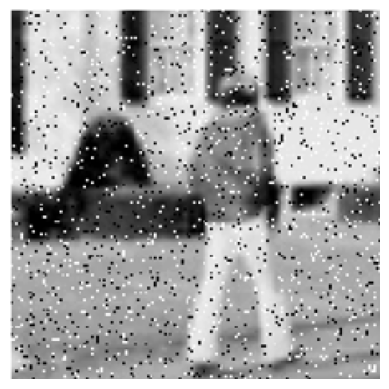

In [24]:
image_path = "saltpepper.png" # user input

img = Image.open(image_path).convert("RGB").resize((w, h))
arr = np.array(img).astype("float32") / 255.0
arr = np.expand_dims(arr, axis=0) # Aggiungo la dimensione batch: (1, h, w, 3)

plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
# Predizione modello
probs = model.predict(arr).flatten()
idx = np.argmax(probs)

# Stampo indice, nome e confidenza
print(f"Classe predetta: {idx} → {class_names[idx]} (confidenza: {probs[idx]:.4f})")

1/1 [==============================] - 0s 56ms/step
Classe predetta: 4 → Salt & Pepper (confidenza: 1.0000)
